<a href="https://colab.research.google.com/github/M-Awwab-Khan/Breast_Cancer_Detection_Using_Neural_Network/blob/main/breast_cancer_detection_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules

In [23]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Loading Data

In [8]:
data = sklearn.datasets.load_breast_cancer()

In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)

# Exploring Data

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.shape

(569, 30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Adding the target labels to our dataframe


In [19]:
df['target'] = data['target']

In [21]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

# Preprocessing and Splitting

In [22]:
X = df.drop(columns=['target'])
y = df['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [25]:
scaler = StandardScaler()
X_train_scld = scaler.fit_transform(X_train)
X_test_scld = scaler.transform(X_test)

# Building the Neural Network

In [43]:
tf.random.set_seed(20)

model = Sequential([
    Flatten(input_shape=(30,)),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy()
    ]

)

history = model.fit(X_train_scld, np.asarray(y_train).reshape((-1, 1)), validation_split=0.1, epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 30ms/step - loss: 0.8055 - binary_accuracy: 0.3570 - val_loss: 0.5694 - val_binary_accuracy: 0.7609
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5318 - binary_accuracy: 0.8337 - val_loss: 0.4014 - val_binary_accuracy: 0.9348
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.3838 - binary_accuracy: 0.9193 - val_loss: 0.3048 - val_binary_accuracy: 0.9565
Epoch 4/20
13/13 [==============================] - 0s 8ms/step - loss: 0.3012 - binary_accuracy: 0.9340 - val_loss: 0.2483 - val_binary_accuracy: 0.9565
Epoch 5/20
13/13 [==============================] - 0s 11ms/step - loss: 0.2526 - binary_accuracy: 0.9364 - val_loss: 0.2112 - val_binary_accuracy: 0.9565
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.2194 - binary_accuracy: 0.9413 - val_loss: 0.1849 - val_binary_accuracy: 0.9783
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.

# Evaluating the model

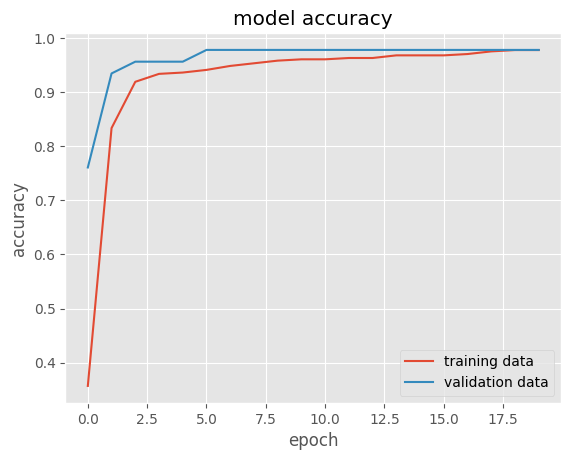

In [44]:
plt.style.use('ggplot')
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

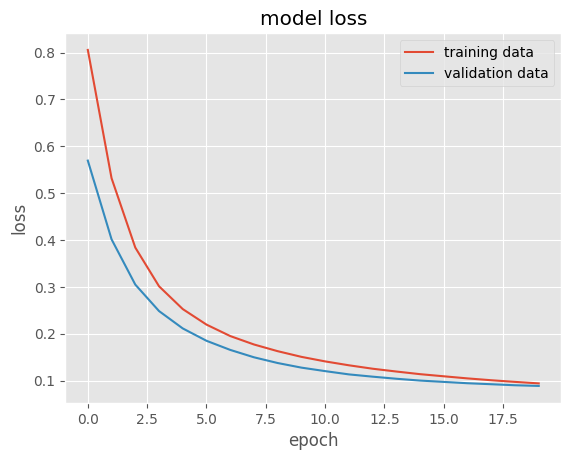

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')


In [47]:
loss, accuracy = model.evaluate(X_test_scld, y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.0689 - binary_accuracy: 0.9912
0.9912280440330505


# Parsing Predicitons

In [48]:
y_pred = model.predict(X_test_scld)

4/4 [==============================] - 0s 5ms/step


In [49]:
print(y_pred.shape)
print(y_pred[:5])

(114, 1)
[[9.8106450e-01]
 [7.1459681e-01]
 [5.3702295e-04]
 [9.4628471e-01]
 [2.4564220e-02]]


In [51]:
pred = [0 if y[0] < 0.5 else 1 for y in y_pred]
pred[:10]

[1, 1, 0, 1, 0, 0, 0, 1, 1, 0]

# Predictive Pipeline

In [52]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [0 if y[0] < 0.5 else 1 for y in prediction]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 23ms/step
[[0.9928955]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Exporting the model

In [53]:
model.save('breast_cancer.keras')

In [54]:
loaded = tf.keras.models.load_model('breast_cancer.keras')
loaded.predict(input_data_std)

1/1 [==============================] - 0s 94ms/step


array([[0.9928955]], dtype=float32)